In [1]:
# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# 전처리 및 머신 러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# 경고 제거 (판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정합니다.)
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

C:\Users\opp06\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\opp06\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
import io
test = pd.read_csv('input/titanic/test.csv')
train = pd.read_csv('input/titanic/train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# 병합 준비
ntrain = train.shape[0]
ntest = test.shape[0]

# 아래는 따로 잘 모셔 둡니다.
y_train = train['Survived'].values
passId = test['PassengerId']

# 병함 파일 만들기
data = pd.concat((train, test))

# 데이터 행과 열의 크기는
print("data size is: {}".format(data.shape))

data size is: (1309, 12)


0    549
1    342
Name: Survived, dtype: int64


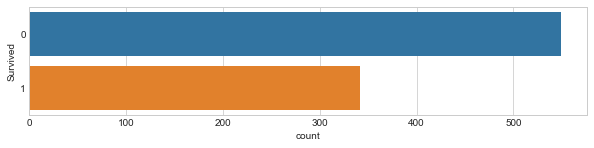

In [6]:
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

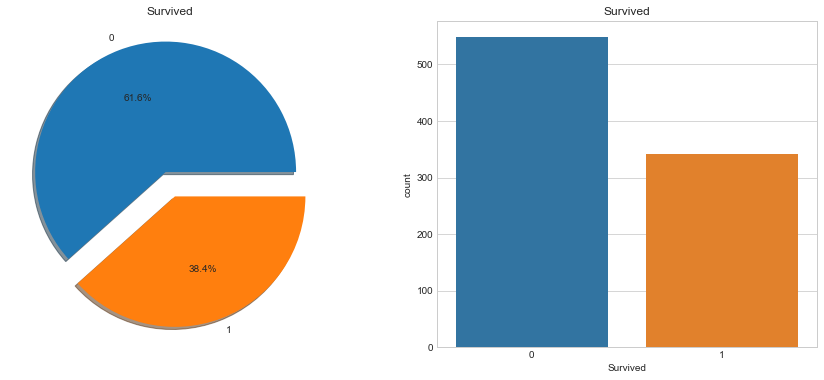

In [7]:
def piecount(col):
    f, ax = plt.subplots(1, 2, figsize=(15,6))
    train[col].value_counts().plot.pie(explode=[0.1 for i in range(train[col].nunique())], autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(col)
    ax[0].set_ylabel('')
    sns.countplot(col, data = train, ax = ax[1])
    ax[1].set_title(col)
    plt.show()
    
piecount('Survived')

## 선실 등급과 생존에 관한 분석

In [8]:
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [9]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


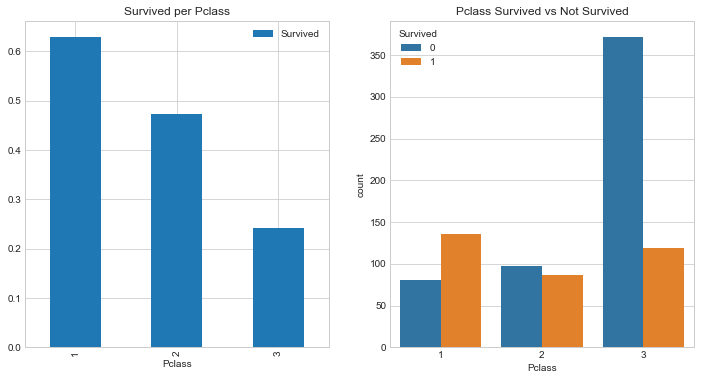

In [10]:
f, ax = plt.subplots(1, 2, figsize=(12,6))
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0]) #1은 생존 0은 죽음이므로 평균을 내서 한눈에 보게
ax[0].set_title('Survived per Pclass')
sns.countplot('Pclass',hue='Survived', data = train, ax=ax[1])
ax[1].set_title('Pclass Survived vs Not Survived')
plt.show()

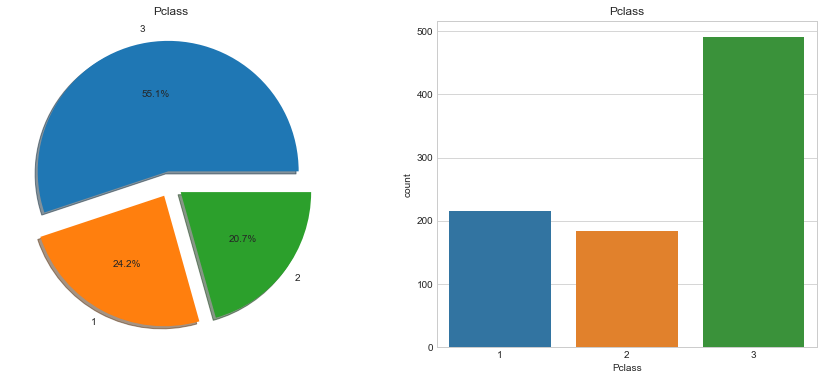

In [11]:
piecount('Pclass')

## 이름과 생존에 관한 분석

In [12]:
data.Name.value_counts() #거의 이름은 한명씩밖에 없음

Kelly, Mr. James                                                     2
Connolly, Miss. Kate                                                 2
Goodwin, Mrs. Frederick (Augusta Tyler)                              1
Cor, Mr. Liudevit                                                    1
Yousif, Mr. Wazli                                                    1
Sivola, Mr. Antti Wilhelm                                            1
Smart, Mr. John Montgomery                                           1
Warren, Mrs. Frank Manley (Anna Sophia Atkinson)                     1
Sweet, Mr. George Frederick                                          1
Bailey, Mr. Percy Andrew                                             1
Kink-Heilmann, Miss. Luise Gretchen                                  1
Henry, Miss. Delia                                                   1
Trout, Mrs. William H (Jessie L)                                     1
Weir, Col. John                                                      1
Maisne

In [13]:
temp = data.copy()
temp['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') #맨뒤에 '.'이 있는 단어를 가져온다

In [14]:
temp['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Don           1
Mme           1
Capt          1
Countess      1
Sir           1
Dona          1
Jonkheer      1
Lady          1
Name: Initial, dtype: int64

In [15]:
#성별이랑 엮었을 때 이름에서 성별과 유사한 단어를 찾을 수 있음
pd.crosstab(temp.Initial, temp.Sex).T.style.background_gradient(cmap='summer_r') 

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [16]:
def survpct(col): #해당열과 생존률의 관계
    return temp.groupby(col)['Survived'].mean()

survpct('Initial')

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [17]:
temp.loc[temp['Initial'] == 'Dona']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial
414,39.0,C105,C,108.9,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,Dona


In [18]:
#Nan 값인 Dona에 'Mrs'를 넣어준다
temp.loc[temp['Initial'] == 'Dona', 'Initial'] = 'Mrs'

In [19]:
temp['LastName'] = data.Name.str.extract('([A-Za-z]+)')
pd.crosstab(temp.LastName, temp.Survived).T.style.background_gradient(cmap='summer_r')

LastName,Abbing,Abbott,Abelson,Adahl,Adams,Ahlin,Aks,Albimona,Alexander,Alhomaki,Ali,Allen,Allison,Allum,Andersen,Anderson,Andersson,Andreasson,Andrew,Andrews,Angle,Appleton,Arnold,Artagaveytia,Asim,Asplund,Astor,Attalah,Aubart,Augustsson,Ayoub,Backstrom,Baclini,Badt,Bailey,Balkic,Ball,Banfield,Barah,Barbara,Barber,Barkworth,Barton,Bateman,Baumann,Baxter,Bazzani,Beane,Beavan,Becker,Beckwith,Beesley,Behr,Bengtsson,Berglund,Berriman,Betros,Bidois,Bing,Birkeland,Bishop,Bissette,Bjornstrom,Blackwell,Blank,Bonnell,Bostandyeff,Boulos,Bourke,Bowen,Bowerman,Bracken,Bradley,Braund,Brewe,Brocklebank,Brown,Bryhl,Burke,Burns,Buss,Butler,Butt,Byles,Bystrom,Cacic,Cairns,Calderhead,Caldwell,Calic,Cameron,Campbell,Canavan,Cann,Caram,Carbines,Cardeza,Carlsson,Carr,Carrau,Carter,Cavendish,Celotti,Chaffee,Chambers,Chapman,Charters,Cherry,Chibnall,Chip,Christmann,Christy,Chronopoulos,Clarke,Cleaver,Clifford,Coelho,Cohen,Coleff,Coleridge,Collander,Colley,Collyer,Compton,Connaghton,Connolly,Connors,Cook,Cor,Corn,Coutts,Coxon,Crease,Cribb,Crosby,Culumovic,Cumings,Cunningham,Dahl,Dahlberg,Dakic,Daly,Danbom,Daniel,Danoff,Dantcheff,Davidson,Davies,Davis,Davison,Dean,Denkoff,Dennis,Devaney,Dick,Dimic,Dodge,Doharr,Doling,Dooley,Dorking,Douglas,Dowdell,Downton,Drazenoic,Drew,Duane,Duff,Duran,Edvardsson,Eitemiller,Eklund,Ekstrom,Elias,Elsbury,Emanuel,Emir,Endres,Eustis,Fahlstrom,Farrell,Farthing,Faunthorpe,Fischer,Fleming,Flynn,Foo,Ford,Foreman,Fortune,Fox,Francatelli,Frauenthal,Frolicher,Frost,Fry,Funk,Futrelle,Fynney,Gale,Gallagher,Garfirth,Garside,Gaskell,Gavey,Gee,Gheorgheff,Giglio,Giles,Gilinski,Gill,Gillespie,Gilnagh,Givard,Glynn,Goldenberg,Goldschmidt,Goldsmith,Goncalves,Goodwin,Graham,Green,Greenberg,Greenfield,Gronnestad,Guggenheim,Gustafsson,Haas,Hagland,Hakkarainen,Hale,Hamalainen,Hampe,Hanna,Hansen,Harder,Harknett,Harmer,Harper,Harrington,Harris,Harrison,Hart,Hassab,Hassan,Hawksford,Hays,Healy,Hedman,Hegarty,Heikkinen,Heininen,Hendekovic,Henry,Herman,Hewlett,Hickman,Hippach,Hirvonen,Hocking,Hodges,Hogeboom,Hold,Holm,Holverson,Homer,Honkanen,Hood,Horgan,Hosono,Hoyt,Humblen,Hunt,Ibrahim,Icard,Ilett,Ilmakangas,Isham,Ivanoff,Jacobsohn,Jalsevac,Jansson,Jardin,Jarvis,Jenkin,Jensen,Jermyn,Jerwan,Johannesen,Johanson,Johansson,Johnson,Johnston,Jonkoff,Jonsson,Jussila,Kallio,Kalvik,Kantor,Karaic,Karlsson,Karun,Kassem,Keane,Keefe,Kelly,Kent,Kenyon,Kiernan,Kilgannon,Kimball,Kink,Kirkland,Klaber,Klasen,Knight,Kraeff,Kvillner,Lahoud,Lahtinen,Laitinen,Laleff,Lam,Landergren,Lang,Laroche,Larsson,LeRoy,Leader,Leeni,Lefebre,Lehmann,Leinonen,Leitch,Lemberopolous,Lemore,Lennon,Leonard,Lester,Lesurer,Levy,Lewy,Leyson,Lievens,Lindahl,Lindblom,Lindell,Lindqvist,Lines,Ling,Lobb,Long,Longley,Louch,Lovell,Lulic,Lundahl,Lurette,Mack,Madigan,Madill,Madsen,Maenpaa,Maioni,Maisner,Mallet,Mamee,Mangan,Mannion,Marechal,Markoff,Markun,Marvin,Masselmani,Matthews,Mayne,McCarthy,McCormack,McCoy,McDermott,McEvoy,McGough,McGovern,McGowan,McKane,McMahon,McNamee,Meanwell,Meek,Mellinger,Mellors,Meo,Mernagh,Meyer,Millet,Milling,Minahan,Mineff,Mionoff,Mitchell,Mitkoff,Mockler,Moen,Molson,Montvila,Moor,Moore,Moran,Moraweck,Morley,Morrow


In [20]:
temp['NumName'] = temp['LastName'].factorize()[0] # 이름에 유니크한 숫자를 붙혀준다

## 성별과 생존에 관한 분석

In [21]:
train[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


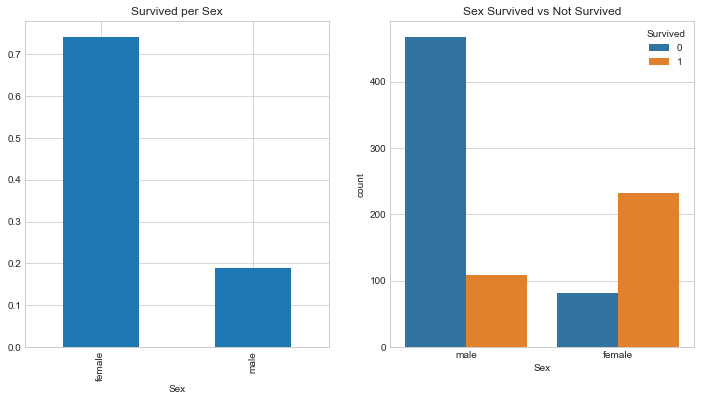

In [22]:
def bag(col, target, title, title1): #해당 열과 비교하고자 하는 열을 비교해 그래프를 그려줌
    f, ax = plt.subplots(1, 2, figsize=(12,6))
    train.groupby([col])[target].mean().plot(kind='bar', ax=ax[0])
    ax[0].set_title(title)
    sns.countplot(col, hue=target, data=train, ax=ax[1])
    ax[1].set_title(title1)
    plt.show()
bag('Sex','Survived', 'Survived per Sex', 'Sex Survived vs Not Survived')

In [23]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='summer_r')

## 이름과 생존에 대한 분석

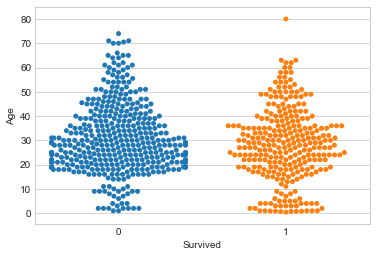

In [24]:
sns.swarmplot(x=train['Survived'], y=train['Age'])
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

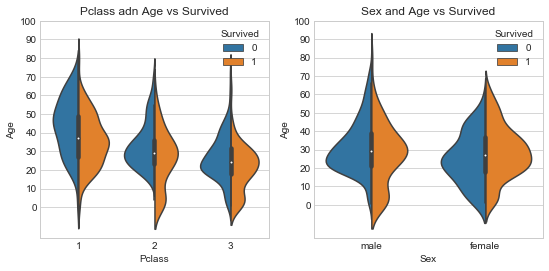

In [25]:
f, ax = plt.subplots(1, 2, figsize=(9, 4))
sns.violinplot('Pclass', 'Age', hue='Survived', data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass adn Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [26]:
# 현대 말로 Initial 정리
temp['Initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona' , 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',  'Miss'  ,'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'], ['Sacrificed', 'Respected', 'Nobles', 'Mr', 'Mrs', 'Respected', 'Mr', 'Nobles', 'Respected', 'Kids', 'Miss', 'Nobles', 'Nobles', 'Mr', 'Mrs', 'Nobles', 'Sacrificed', 'Nobles'],inplace=True)
temp['Initial'].replace(['Kids', 'Miss', 'Mr', 'Mrs', 'Nobles', 'Respected', 'Sacrificed'], [4, 4, 2, 5, 6, 3, 1], inplace=True)

In [27]:
temp['Initial']

0      2
1      5
2      4
3      5
4      2
5      2
6      2
7      4
8      5
9      5
10     4
11     4
12     2
13     2
14     4
15     5
16     4
17     2
18     5
19     5
20     2
21     2
22     4
23     2
24     4
25     5
26     2
27     2
28     4
29     2
      ..
388    2
389    4
390    2
391    5
392    4
393    2
394    2
395    5
396    2
397    5
398    2
399    2
400    4
401    2
402    4
403    2
404    2
405    2
406    2
407    2
408    4
409    4
410    4
411    5
412    4
413    2
414    5
415    2
416    2
417    4
Name: Initial, Length: 1309, dtype: int64

In [28]:
temp['Age_Range'] = pd.qcut(temp['Age'], 10)

In [29]:
survpct("Age_Range") #나이 범위와 생존률과의 관계

Age_Range
(0.169, 14.0]    0.584416
(14.0, 19.0]     0.390805
(19.0, 22.0]     0.283582
(22.0, 25.0]     0.371429
(25.0, 28.0]     0.393443
(28.0, 31.0]     0.393939
(31.0, 36.0]     0.483516
(36.0, 42.0]     0.378788
(42.0, 50.0]     0.384615
(50.0, 80.0]     0.343750
Name: Survived, dtype: float64

In [30]:
#나이 그룹의 평균을 Agroup을 저장
temp['Agroup'] = 0
temp.loc[temp['Age'] < 1.0, 'Agroup'] = 1
temp.loc[(temp['Age'] >=1.0) & (temp['Age'] <= 3.0), 'Agroup'] = 2
temp.loc[(temp['Age'] > 3.0) & (temp['Age'] < 11.0), 'Agroup'] = 7
temp.loc[(temp['Age'] >= 11.0) & (temp['Age'] < 15.0), 'Agroup'] = 13
temp.loc[(temp['Age'] >= 15.0) & (temp['Age'] < 18.0), 'Agroup'] = 16
temp.loc[(temp['Age'] >= 18.0) & (temp['Age'] <=  20.0), 'Agroup'] = 18
temp.loc[(temp['Age'] > 20.0) & (temp['Age'] <= 22.0), 'Agroup'] = 21
temp.loc[(temp['Age'] > 22.0) & (temp['Age'] <= 26.0), 'Agroup'] = 24
temp.loc[(temp['Age'] > 26.0) & (temp['Age'] <= 30.0), 'Agroup'] = 28
temp.loc[(temp['Age'] > 30.0) & (temp['Age'] <= 32.0), 'Agroup'] = 31
temp.loc[(temp['Age'] > 32.0) & (temp['Age'] <= 34.0), 'Agroup'] = 33
temp.loc[(temp['Age'] > 34.0) & (temp['Age'] <= 38.0), 'Agroup'] = 36
temp.loc[(temp['Age'] > 38.0) & (temp['Age'] <= 52.0), 'Agroup'] = 45
temp.loc[(temp['Age'] > 52.0) & (temp['Age'] <= 75.0), 'Agroup'] = 60
temp.loc[temp['Age'] > 75.0, 'Agroup'] = 78

In [31]:
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,LastName,NumName,Age_Range,Agroup
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Braund,0,"(19.0, 22.0]",21
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,5,Cumings,1,"(36.0, 42.0]",36
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,4,Heikkinen,2,"(25.0, 28.0]",24
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,5,Futrelle,3,"(31.0, 36.0]",36
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,2,Allen,4,"(31.0, 36.0]",36


In [32]:
#성별을 남자, 여자, 아이로 구분
temp.loc[(temp['Sex'] == 'male'), 'Sex'] = 1
temp.loc[(temp['Sex'] == 'female'), 'Sex'] = 2
temp.loc[(temp['Age'] < 1), 'Sex'] = 3

In [33]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

In [34]:
temp.loc[(temp['SibSp'] == 0) & (temp['Parch'] == 0), 'Alone'] = 1 #형제, 자매가 있는지 없는지, 남편이 있는지 없는지
temp['Family'] = temp['Parch'] + temp['SibSp'] + 1

In [35]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

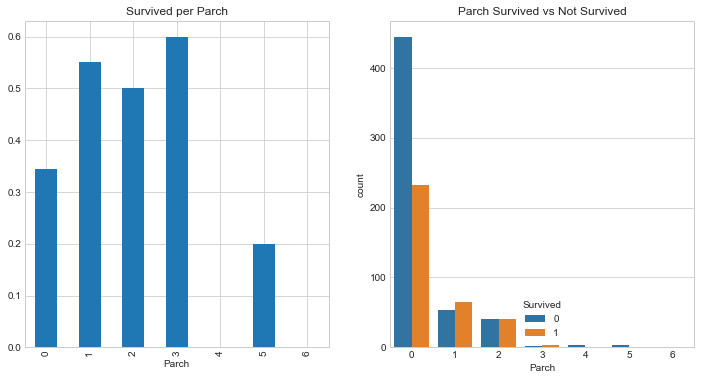

In [36]:
bag('Parch', 'Survived', 'Survived per Parch', 'Parch Survived vs Not Survived')

In [37]:
 pd.crosstab([temp.Family, temp.Survived], temp.Pclass, margins=True).style.background_gradient(cmap='summer_r')

## 티켓 정리

In [38]:
temp.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [39]:
temp.Ticket.isnull().any() #NULL 값은 없음

False

In [40]:
temp['Initick'] = temp.Ticket.str.extract('^([A-Za-z0-9]+)') #티켓중에 영문 숫자만 추출
temp = temp.reset_index(drop=True)

temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,2,Braund,0,"(19.0, 22.0]",21,NaN,2,A
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,2,1,1.0,PC 17599,5,Cumings,1,"(36.0, 42.0]",36,NaN,2,PC
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,2,0,1.0,STON/O2. 3101282,4,Heikkinen,2,"(25.0, 28.0]",24,1.0,1,STON
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,2,1,1.0,113803,5,Futrelle,3,"(31.0, 36.0]",36,NaN,2,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,2,Allen,4,"(31.0, 36.0]",36,1.0,1,373450


In [41]:
temp['NumTicket'] = temp['Initick'].factorize()[0]
temp.head(n=15)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,A/5 21171,2,Braund,0,"(19.0, 22.0]",21,NaN,2,A,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,2,1,...,PC 17599,5,Cumings,1,"(36.0, 42.0]",36,NaN,2,PC,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,2,0,...,STON/O2. 3101282,4,Heikkinen,2,"(25.0, 28.0]",24,1.0,1,STON,2
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,2,1,...,113803,5,Futrelle,3,"(31.0, 36.0]",36,NaN,2,113803,3
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,373450,2,Allen,4,"(31.0, 36.0]",36,1.0,1,373450,4
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,1,0,...,330877,2,Moran,5,NaN,0,1.0,1,330877,5
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,1,0,...,17463,2,McCarthy,6,"(50.0, 80.0]",60,1.0,1,17463,6
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,1,3,...,349909,4,Palsson,7,"(0.169, 14.0]",2,NaN,5,349909,7
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,2,0,...,347742,5,Johnson,8,"(25.0, 28.0]",28,NaN,3,347742,8
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,2,1,...,237736,5,Nasser,9,"(0.169, 14.0]",13,NaN,2,237736,9


## 가격에 대한 분석

In [42]:
print('Highest Fare : ',temp['Fare'].max())
print('Lowest Fare : ',temp['Fare'].min())
print('Average Fare : ',temp['Fare'].mean())

Highest Fare :  512.3292
Lowest Fare :  0.0
Average Fare :  33.2954792813456


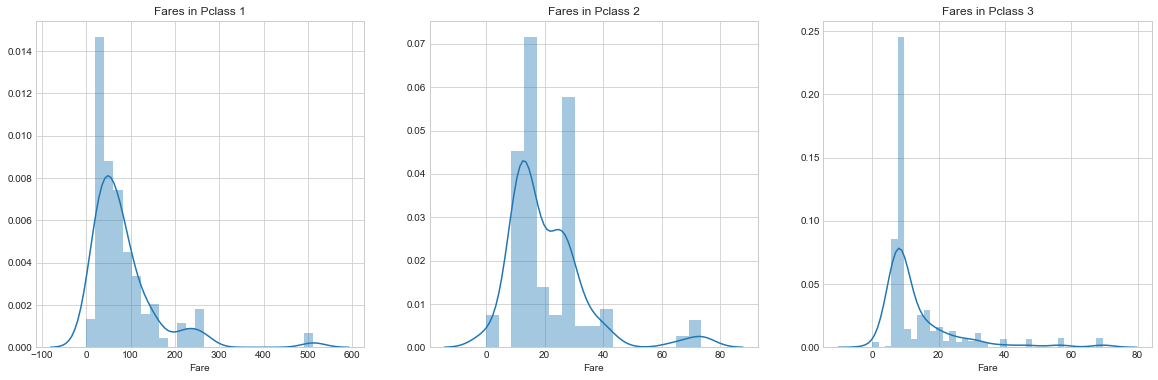

In [43]:
f, ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(train[train['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

In [44]:
#Fare를 qcut으로 구간을 나눠보고 그룹을 정하기 위해 평균값을 계산해본다
def groupmean(a,b):
    return temp.groupby([a])[b].mean().to_frame().style.background_gradient(cmap='summer_r')

temp['Fare_Range'] = pd.qcut(train['Fare'], 10)
groupmean('Fare_Range','Fare')

,Fare
Fare_Range,
"(-0.001, 7.55]",5.92872
"(7.55, 7.854]",7.76849
"(7.854, 8.05]",7.96367
"(8.05, 10.5]",9.52137
"(10.5, 14.454]",12.9402
"(14.454, 21.679]",17.3864
"(21.679, 27.0]",25.4875
"(27.0, 39.688]",32.2822
"(39.688, 77.958]",59.4446


In [45]:
#위의 분포와 평균값을 보고 FGroup을 만들어 그룹에 인덱싱 해주었다.
temp['Fgroup'] = 0 

temp.loc[temp['Fare'] <= 0,'Fgroup'] = 0
temp.loc[(temp['Fare'] > 0) & (temp['Fare'] <= 7.125), 'Fgroup'] = 1
temp.loc[(temp['Fare'] > 7.125) & (temp['Fare'] <= 7.9), 'Fgroup'] = 2
temp.loc[(temp['Fare'] > 7.9) & (temp['Fare'] <= 8.03), 'Fgroup'] = 3
temp.loc[(temp['Fare'] > 8.03) & (temp['Fare'] < 10.5), 'Fgroup'] = 4
temp.loc[(temp['Fare'] >= 10.5) & (temp['Fare'] < 23.0), 'Fgroup'] = 5
temp.loc[(temp['Fare'] >= 23.0) & (temp['Fare'] <= 27.8), 'Fgroup'] = 6
temp.loc[(temp['Fare'] > 27.8) & (temp['Fare'] <= 51.0), 'Fgroup'] = 7
temp.loc[(temp['Fare'] > 51.0) & (temp['Fare'] <= 73.5), 'Fgroup'] = 8
temp.loc[temp['Fare'] > 73.5, 'Fgroup'] = 9

temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,Braund,0,"(19.0, 22.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,2,1,...,Cumings,1,"(36.0, 42.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,2,0,...,Heikkinen,2,"(25.0, 28.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,2,1,...,Futrelle,3,"(31.0, 36.0]",36,NaN,2,113803,3,"(39.688, 77.958]",8
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,Allen,4,"(31.0, 36.0]",36,1.0,1,373450,4,"(7.854, 8.05]",4


## Cabin(선실) 분석

In [46]:
temp.Cabin.isnull().sum() #결측값 확인

1014

In [47]:
temp['Inicab'] = 0
temp['Inicab'] = temp['Cabin'].str.extract('^([A-Za-z]+)') #영어로된 단어만 추출
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 1)), 'Inicab'] = 'X' #빈값이고 Pclass가 1일 때 X 부여
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 2)), 'Inicab'] = 'Y' #빈값이고 Pclass가 2일 때 Y 부여
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 3)), 'Inicab'] = 'Y' #빈값이고 Pclass가 3일 때 Z 부여
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,0,"(19.0, 22.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2,Y
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,2,1,...,1,"(36.0, 42.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8,C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,2,0,...,2,"(25.0, 28.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3,Y
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,2,1,...,3,"(31.0, 36.0]",36,NaN,2,113803,3,"(39.688, 77.958]",8,C
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,4,"(31.0, 36.0]",36,1.0,1,373450,4,"(7.854, 8.05]",4,Y


In [48]:
temp.Inicab.isnull().sum() #결측값 확인

0

In [49]:
temp['Inicab'] = temp['Inicab'].factorize()[0]
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,0,"(19.0, 22.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,2,1,...,1,"(36.0, 42.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,2,0,...,2,"(25.0, 28.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,2,1,...,3,"(31.0, 36.0]",36,NaN,2,113803,3,"(39.688, 77.958]",8,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,4,"(31.0, 36.0]",36,1.0,1,373450,4,"(7.854, 8.05]",4,0


## Embarked(승선한 장소) 분석

In [50]:
pd.crosstab([temp.Embarked, temp.Pclass],[temp.Sex, temp.Survived], margins=True).style.background_gradient(cmap='summer_r')

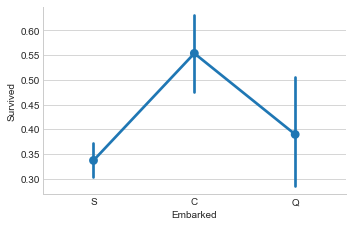

In [51]:
sns.factorplot('Embarked','Survived', data=temp) #C에서 승선한 사람의 생존률이 더 높음
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

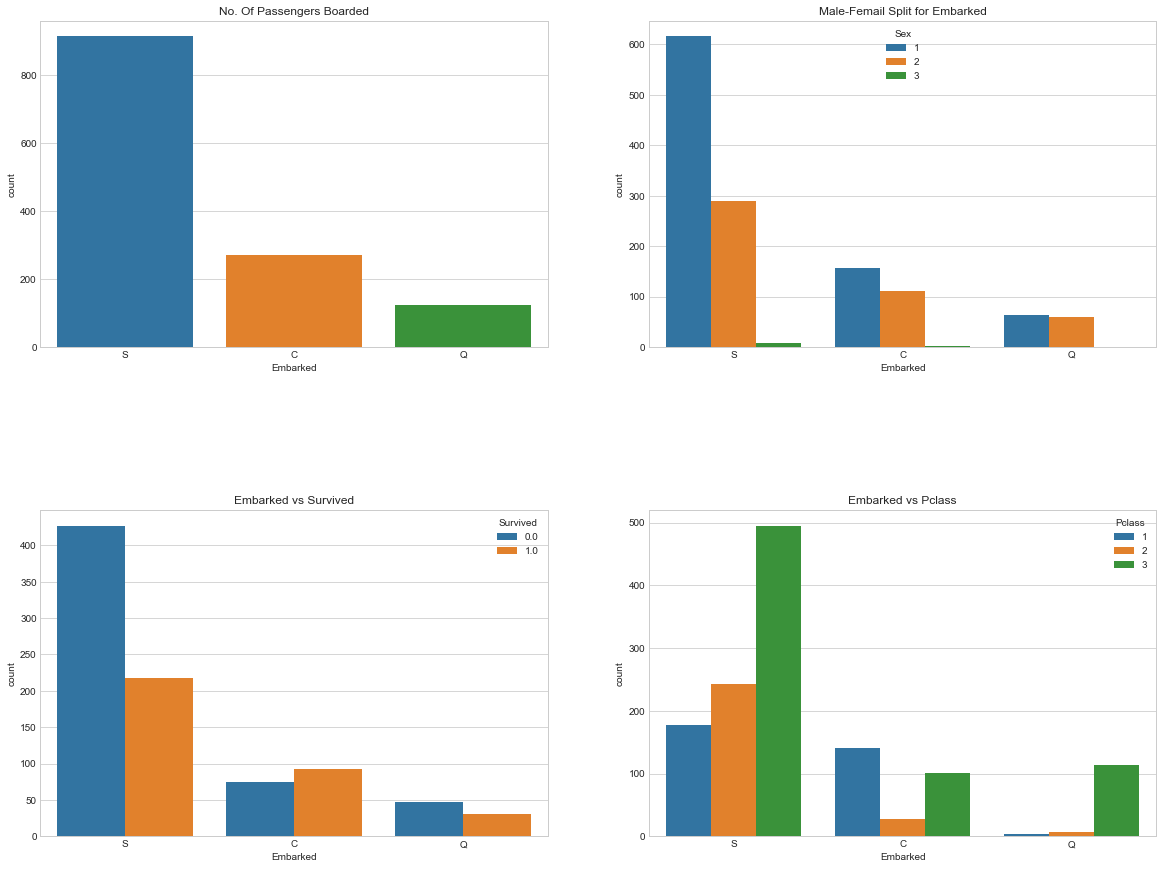

In [52]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=temp, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=temp, ax=ax[0,1])
ax[0,1].set_title('Male-Femail Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=temp, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=temp, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [53]:
temp.Embarked.isnull().sum() #2개의 빈값이 존재

2

In [54]:
temp.loc[(temp.Embarked.isnull())] #결손값 2개의 ticket값이 같음

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,2,0,...,58,"(36.0, 42.0]",36,1.0,1,113572,51,"(77.958, 512.329]",9,7
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,2,0,...,616,"(50.0, 80.0]",60,1.0,1,113572,51,"(77.958, 512.329]",9,7


In [55]:
#다른 승객 중 이 두명과 같은 티켓을 가진사람을 확인
temp.loc[(temp.Initick == '113572')]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,2,0,...,58,"(36.0, 42.0]",36,1.0,1,113572,51,"(77.958, 512.329]",9,7
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,2,0,...,616,"(50.0, 80.0]",60,1.0,1,113572,51,"(77.958, 512.329]",9,7


In [56]:
temp.sort_values(['Ticket'], ascending=True)[55:70] #티켓으로 오름차순했을 때 58,59번째에 해당하는 두명이 있다

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
54,65.0,B30,C,61.9792,"Ostby, Mr. Engelhart Cornelius",1,55,1,1,0,...,51,"(50.0, 80.0]",60,NaN,2,113509,46,"(39.688, 77.958]",8,7
351,NaN,C128,S,35.0000,"Williams-Lambert, Mr. Fletcher Fellows",0,352,1,1,0,...,17,NaN,0,1.0,1,113510,233,"(27.0, 39.688]",7,1
252,62.0,C87,S,26.5500,"Stead, Mr. William Thomas",0,253,1,1,0,...,217,"(50.0, 80.0]",60,1.0,1,113514,172,"(21.679, 27.0]",6,1
829,62.0,B28,NaN,80.0000,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,2,0,...,616,"(50.0, 80.0]",60,1.0,1,113572,51,"(77.958, 512.329]",9,7
61,38.0,B28,NaN,80.0000,"Icard, Miss. Amelie",0,62,1,2,0,...,58,"(36.0, 42.0]",36,1.0,1,113572,51,"(77.958, 512.329]",9,7
802,11.0,B96 B98,S,120.0000,"Carter, Master. William Thornton II",2,803,1,1,1,...,215,"(0.169, 14.0]",13,NaN,4,113760,254,"(77.958, 512.329]",9,7
390,36.0,B96 B98,S,120.0000,"Carter, Mr. William Ernest",2,391,1,1,1,...,215,"(31.0, 36.0]",36,NaN,4,113760,254,"(77.958, 512.329]",9,7
435,14.0,B96 B98,S,120.0000,"Carter, Miss. Lucile Polk",2,436,1,2,1,...,215,"(0.169, 14.0]",13,NaN,4,113760,254,"(77.958, 512.329]",9,7
763,36.0,B96 B98,S,120.0000,"Carter, Mrs. William Ernest (Lucile Polk)",2,764,1,2,1,...,215,"(31.0, 36.0]",36,NaN,4,113760,254,"(77.958, 512.329]",9,7
185,NaN,A32,S,50.0000,"Rood, Mr. Hugh Roscoe",0,186,1,1,0,...,162,NaN,0,1.0,1,113767,128,"(39.688, 77.958]",7,5


In [57]:
temp.loc[(temp.Embarked.isnull()),'Embarked'] = 'S' #위아래를 봤을때 S일 가능성이 높기때문에 S를 넣어준다

In [58]:
temp['Embarked'] = temp['Embarked'].factorize()[0]
temp[11:20]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
11,58.0,C103,0,26.5500,"Bonnell, Miss. Elizabeth",0,12,1,2,0,...,11,"(50.0, 80.0]",60,1.0,1,113783,11,"(21.679, 27.0]",6,1
12,20.0,NaN,0,8.0500,"Saundercock, Mr. William Henry",0,13,3,1,0,...,12,"(19.0, 22.0]",18,1.0,1,A,0,"(7.854, 8.05]",4,0
13,39.0,NaN,0,31.2750,"Andersson, Mr. Anders Johan",5,14,3,1,1,...,13,"(36.0, 42.0]",45,NaN,7,347082,12,"(27.0, 39.688]",7,0
14,14.0,NaN,0,7.8542,"Vestrom, Miss. Hulda Amanda Adolfina",0,15,3,2,0,...,14,"(0.169, 14.0]",13,1.0,1,350406,13,"(7.55, 7.854]",2,0
15,55.0,NaN,0,16.0000,"Hewlett, Mrs. (Mary D Kingcome)",0,16,2,2,0,...,15,"(50.0, 80.0]",60,1.0,1,248706,14,"(14.454, 21.679]",5,0
16,2.0,NaN,2,29.1250,"Rice, Master. Eugene",1,17,3,1,4,...,16,"(0.169, 14.0]",2,NaN,6,382652,15,"(27.0, 39.688]",7,0
17,NaN,NaN,0,13.0000,"Williams, Mr. Charles Eugene",0,18,2,1,0,...,17,NaN,0,1.0,1,244373,16,"(10.5, 14.454]",5,0
18,31.0,NaN,0,18.0000,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",0,19,3,2,1,...,18,"(28.0, 31.0]",31,NaN,2,345763,17,"(14.454, 21.679]",5,0
19,NaN,NaN,1,7.2250,"Masselmani, Mrs. Fatima",0,20,3,2,0,...,19,NaN,0,1.0,1,2649,18,"(-0.001, 7.55]",2,0


In [59]:
survpct('Initial')

Initial
1    0.000000
2    0.156069
3    0.454545
4    0.675676
5    0.792000
6    1.000000
Name: Survived, dtype: float64

In [60]:
survpct('Pclass')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [61]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

In [62]:
survpct('Agroup')

Agroup
0     0.293785
1     1.000000
2     0.565217
7     0.529412
13    0.500000
16    0.457143
18    0.318182
21    0.307692
24    0.363636
28    0.400000
31    0.459459
33    0.406250
36    0.474576
45    0.388889
60    0.320000
78    1.000000
Name: Survived, dtype: float64

In [63]:
survpct('Fgroup')

Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64

In [64]:
temp['Priority'] = 0
temp.loc[(temp['Initial']==6), 'Priority'] = 1
temp.loc[(temp['Pclass'] == 1) & (temp['Sex'] == 2), 'Priority'] = 2
temp.loc[(temp['Age'] < 1), 'Priority'] = 3
temp.loc[(temp['Pclass'] ==1) & (temp['Age'] <= 17), 'Priority'] = 4
temp.loc[(temp['Pclass'] ==2) & (temp['Age'] <= 17), 'Priority'] = 5
temp.loc[(temp['Pclass'] ==2) & (temp['Sex'] == 2), 'Priority'] = 6
temp.loc[(temp['Fgroup'] ==9), 'Priority'] = 7

In [65]:
survpct('Priority')

Priority
0    0.229508
1    1.000000
2    0.965517
3    1.000000
4    1.000000
5    0.818182
6    0.921053
7    0.762887
Name: Survived, dtype: float64

In [66]:
temp['FH'] = 0
temp.loc[(temp['Sex'] == 1),'FH'] = 0
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 2), 'FH'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 3), 'FH'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 4), 'FH'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'FH'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'FH'] = 6
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] == 3), 'FH'] = 7
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] == 5), 'FH'] = 8

In [67]:
survpct('FH')

FH
0    0.227618
2    0.918033
3    0.833333
4    0.769231
5    0.970588
6    1.000000
7    0.666667
8    0.720930
Name: Survived, dtype: float64

In [68]:
temp.FH.value_counts()

0    972
8    120
2     87
5     52
3     47
4     20
7      8
6      3
Name: FH, dtype: int64

In [69]:
temp['MH'] = 0
temp.loc[(temp['Sex'] == 2),'MH'] = 0
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 2), 'MH'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 3), 'MH'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 4), 'MH'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'MH'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'MH'] = 6
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] == 3), 'MH'] = 7
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] == 5), 'MH'] = 8

In [70]:
survpct('MH')

MH
0    0.450847
2    0.269231
3    0.322581
4    0.500000
5    0.333333
6    0.000000
7    0.384615
8    0.172727
Name: Survived, dtype: float64

In [71]:
temp.MH.value_counts()

0    857
8    175
5    108
2     76
3     48
6     20
7     16
4      9
Name: MH, dtype: int64

In [72]:
temp['FL'] = 0
temp.loc[(temp['Sex'] == 1),'FL'] = 0
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] < 5), 'FL'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] != 3), 'FL'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['FH'] == 1), 'FL'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] < 1) & (temp['Pclass'] == 1), 'FL'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] > 4) & (temp['Pclass'] == 2), 'FL'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'FL'] = 6

In [73]:
survpct('FL')

FL
0    0.191710
1    0.500000
2    0.770161
5    1.000000
6    0.616667
Name: Survived, dtype: float64

In [74]:
temp.FL.value_counts()

0    847
2    357
6    100
1      3
5      2
Name: FL, dtype: int64

In [75]:
temp['ML'] = 0
temp.loc[(temp['Sex'] == 2),'ML'] = 0
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] < 5), 'ML'] = 1
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] != 3), 'ML'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['MH'] < 7), 'ML'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] < 2), 'ML'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] > 4), 'ML'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'ML'] = 6

In [76]:
survpct('ML')

ML
0    0.746082
1    0.333333
2    0.275000
3    0.303371
4    0.217687
5    0.034483
6    0.121212
Name: Survived, dtype: float64

In [77]:
temp.ML.value_counts()

0    474
6    372
4    224
3    133
2     62
5     41
1      3
Name: ML, dtype: int64

## 13가지의 항목 결정

In [78]:
temp['F1'] = temp['Priority']
temp['F2'] = temp['FH']
temp['F3'] = temp['MH']
temp['F4'] = temp['FL']
temp['F5'] = temp['ML']
temp['F6'] = temp['Initial']
temp['F7'] = temp['Fgroup']
temp['F8'] = temp['NumName']
temp['F9'] = temp['NumTicket']
temp['F10'] = temp['Family']
temp['F11'] = temp['Embarked']
temp['F12'] = temp['Sex']
temp['F13'] = temp['Pclass']

In [79]:
temp[11:20]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
11,58.0,C103,0,26.5500,"Bonnell, Miss. Elizabeth",0,12,1,2,0,...,2,0,4,6,11,11,1,0,2,1
12,20.0,NaN,0,8.0500,"Saundercock, Mr. William Henry",0,13,3,1,0,...,0,6,2,4,12,0,1,0,1,3
13,39.0,NaN,0,31.2750,"Andersson, Mr. Anders Johan",5,14,3,1,1,...,0,5,2,7,13,12,7,0,1,3
14,14.0,NaN,0,7.8542,"Vestrom, Miss. Hulda Amanda Adolfina",0,15,3,2,0,...,6,0,4,2,14,13,1,0,2,3
15,55.0,NaN,0,16.0000,"Hewlett, Mrs. (Mary D Kingcome)",0,16,2,2,0,...,2,0,5,5,15,14,1,0,2,2
16,2.0,NaN,2,29.1250,"Rice, Master. Eugene",1,17,3,1,4,...,0,5,4,7,16,15,6,2,1,3
17,NaN,NaN,0,13.0000,"Williams, Mr. Charles Eugene",0,18,2,1,0,...,0,4,2,5,17,16,1,0,1,2
18,31.0,NaN,0,18.0000,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",0,19,3,2,1,...,2,0,5,5,18,17,2,0,2,3
19,NaN,NaN,1,7.2250,"Masselmani, Mrs. Fatima",0,20,3,2,0,...,6,0,5,2,19,18,1,1,2,3


## 레이블 인코딩

In [80]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [81]:
df1 = pd.DataFrame()
good_columns = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13']
df1[good_columns] = temp[good_columns]

In [82]:
df1.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,2,2,0,0,2,0,1,3
1,2,2,0,2,0,5,8,1,1,2,1,2,1
2,0,7,0,6,0,4,3,2,2,1,0,2,3
3,2,2,0,2,0,5,8,3,3,2,0,2,1
4,0,0,0,0,6,2,4,4,4,1,0,1,3


In [83]:
dfh = df1.copy()

In [84]:
df1_enc = df1.apply(LabelEncoder().fit_transform)
df1_enc.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,1,0,3,1,2,0,0,1,0,0,2
1,2,1,0,2,0,4,8,1,1,1,1,1,0
2,0,6,0,4,0,3,3,2,2,0,0,1,2
3,2,1,0,2,0,4,8,3,3,1,0,1,0
4,0,0,0,0,6,1,4,4,4,0,0,0,2


## 원핫인코딩

In [85]:
one_hot_cols = dfh.columns.tolist()
dfh_enc = pd.get_dummies(dfh, columns=one_hot_cols)
dfh_enc.head()

,F1_0,F1_1,F1_2,F1_3,F1_4,F1_5,F1_6,F1_7,F2_0,F2_2,...,F10_11,F11_0,F11_1,F11_2,F12_1,F12_2,F12_3,F13_1,F13_2,F13_3
0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1


## 머신러닝 적용

In [86]:
train = dfh_enc[:ntrain]
test = dfh_enc[ntrain:]

In [87]:
X_test = test
X_train = train

In [88]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

models = [ran, knn,log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores = {}

for ind, mod in enumerate(models):
    mod.fit(X_train,y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = 'accuracy', cv=10)
    scores[model_names[ind]] = acc
    
print(scores)


{'Random Forest': array([0.82222222, 0.83333333, 0.74157303, 0.86516854, 0.88764045,
       0.85393258, 0.85393258, 0.7752809 , 0.84269663, 0.85227273]), 'K Nearest Neighbour': array([0.66666667, 0.64444444, 0.64044944, 0.66292135, 0.70786517,
       0.73033708, 0.69662921, 0.71910112, 0.74157303, 0.70454545]), 'Logistic Regression': array([0.82222222, 0.82222222, 0.7752809 , 0.87640449, 0.83146067,
       0.80898876, 0.82022472, 0.76404494, 0.84269663, 0.85227273]), 'XGBoost': array([0.77777778, 0.82222222, 0.73033708, 0.88764045, 0.85393258,
       0.84269663, 0.83146067, 0.7752809 , 0.82022472, 0.84090909]), 'Gradient Boosting': array([0.85555556, 0.82222222, 0.76404494, 0.88764045, 0.88764045,
       0.83146067, 0.84269663, 0.7752809 , 0.86516854, 0.84090909]), 'SVC': array([0.8       , 0.8       , 0.79775281, 0.86516854, 0.84269663,
       0.80898876, 0.80898876, 0.76404494, 0.82022472, 0.82954545]), 'Extra Trees': array([0.8       , 0.83333333, 0.7752809 , 0.86516854, 0.88764045,

In [90]:
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)
result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,mean
Bagging Classifier,0.844444,0.877778,0.764045,0.898876,0.876404,0.853933,0.842697,0.775281,0.842697,0.852273,0.842843
Gradient Boosting,0.855556,0.822222,0.764045,0.887640,0.887640,0.831461,0.842697,0.775281,0.865169,0.840909,0.837262
Extra Trees,0.800000,0.833333,0.775281,0.865169,0.887640,0.842697,0.865169,0.775281,0.865169,0.852273,0.836201
Random Forest,0.822222,0.833333,0.741573,0.865169,0.887640,0.853933,0.853933,0.775281,0.842697,0.852273,0.832805
Logistic Regression,0.822222,0.822222,0.775281,0.876404,0.831461,0.808989,0.820225,0.764045,0.842697,0.852273,0.821582
AdaBoost,0.833333,0.800000,0.764045,0.842697,0.865169,0.764045,0.831461,0.820225,0.842697,0.829545,0.819322
XGBoost,0.777778,0.822222,0.730337,0.887640,0.853933,0.842697,0.831461,0.775281,0.820225,0.840909,0.818248
SVC,0.800000,0.800000,0.797753,0.865169,0.842697,0.808989,0.808989,0.764045,0.820225,0.829545,0.813741
Gaussian Process,0.655556,0.600000,0.696629,0.707865,0.685393,0.741573,0.651685,0.707865,0.730337,0.738636,0.691554
K Nearest Neighbour,0.666667,0.644444,0.640449,0.662921,0.707865,0.730337,0.696629,0.719101,0.741573,0.704545,0.691453


Text(0.5, 0, 'Accuracy Score (%)')

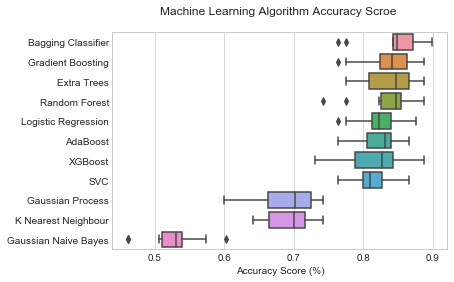

In [91]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Scroe \n')
plt.xlabel('Accuracy Score (%)')

In [92]:
def importance_plotting(data, xlabel, ylabel, title, n=20):
    sns.set(style='whitegrid')
    ax = data.tail(n).plot(kind='barh')
    
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    plt.show()

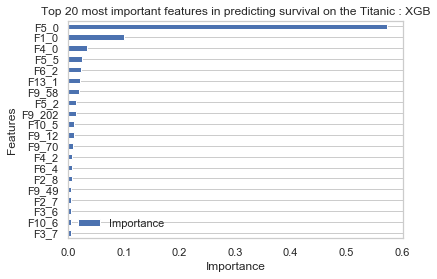

In [93]:
fi = {'Features':train.columns.tolist(), 'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance',ascending=True)

title = 'Top 20 most important features in predicting survival on the Titanic : XGB'
importance_plotting(importance, 'Importance','Features',title,20)

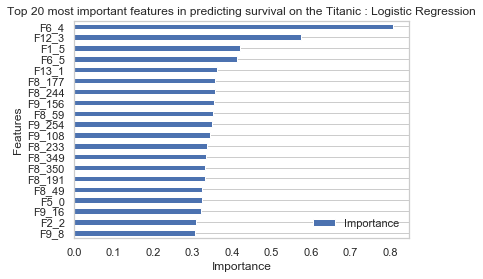

In [94]:
fi = {'Features':train.columns.tolist(), 'Importance':np.transpose(log.coef_[0])}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance',ascending=True)

title = 'Top 20 most important features in predicting survival on the Titanic : Logistic Regression'
importance_plotting(importance, 'Importance','Features',title,20)

In [95]:
gbc_imp = pd.DataFrame({'Feature':train.columns, 'Importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':train.columns, 'Importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns, 'Importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':train.columns, 'Importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':train.columns, 'Importance':ada.feature_importances_})

importances = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')

importances['Average'] = importances.mean(axis=1)

importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

In [96]:
importances.head()

,Feature,Importance_x,Importance_y,Importance_x,Importance_y,Importance,Average
0,F5_0,0.053404,0.572886,0.044309,0.031435,0.00,0.140407
1,F1_0,0.231528,0.101107,0.045292,0.044947,0.02,0.088575
2,F12_1,0.172152,0.000000,0.024732,0.036813,0.02,0.050739
3,F6_2,0.124910,0.022574,0.012061,0.013371,0.04,0.042583
4,F13_1,0.037680,0.021667,0.020077,0.015864,0.06,0.031058


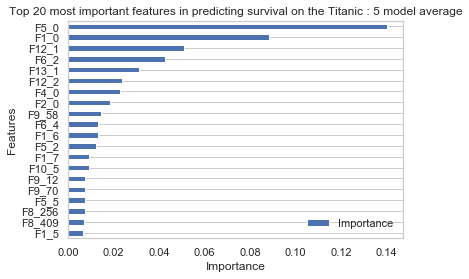

In [97]:
fi = {'Features':importances['Feature'], 'Importance':importances['Average']}
importance = pd.DataFrame(fi).set_index('Features').sort_values('Importance',ascending=True)

title = 'Top 20 most important features in predicting survival on the Titanic : 5 model average'
importance_plotting(importance, 'Importance','Features',title,20)

In [98]:
print(importance.shape)
importance1 = importance[-381:]
importance1[371:381]

(1649, 1)


,Importance
Features,
F6_4,0.013136
F9_58,0.014327
F2_0,0.018315
F4_0,0.022778
F12_2,0.023814
F13_1,0.031058
F6_2,0.042583
F12_1,0.050739
F1_0,0.088575


In [99]:
mylist = list(importance1.index)
print(mylist)

['F10_8', 'F8_123', 'F8_593', 'F8_456', 'F9_85', 'F9_350', 'F8_187', 'F8_3', 'F8_266', 'F9_519', 'F8_240', 'F9_363', 'F9_212', 'F8_251', 'F9_341', 'F8_314', 'F8_646', 'F8_383', 'F9_133', 'F8_230', 'F8_290', 'F9_210', 'F8_468', 'F9_404', 'F9_400', 'F9_17', 'F9_371', 'F9_147', 'F8_178', 'F8_51', 'F8_129', 'F8_398', 'F8_355', 'F8_94', 'F5_1', 'F9_33', 'F9_289', 'F8_26', 'F9_230', 'F8_211', 'F9_528', 'F8_270', 'F8_160', 'F9_291', 'F8_133', 'F8_250', 'F6_1', 'F8_522', 'F8_498', 'F9_81', 'F8_482', 'F8_225', 'F8_2', 'F8_258', 'F8_529', 'F8_100', 'F8_632', 'F9_283', 'F8_565', 'F9_258', 'F8_154', 'F9_353', 'F8_60', 'F1_1', 'F8_242', 'F9_37', 'F8_73', 'F8_650', 'F9_10', 'F8_238', 'F9_34', 'F9_41', 'F8_33', 'F8_46', 'F8_442', 'F8_62', 'F8_56', 'F8_492', 'F9_264', 'F9_419', 'F9_7', 'F8_208', 'F8_318', 'F8_16', 'F9_125', 'F8_188', 'F9_131', 'F9_418', 'F9_144', 'F8_110', 'F8_622', 'F9_395', 'F8_81', 'F9_44', 'F8_203', 'F8_504', 'F9_93', 'F8_338', 'F8_309', 'F8_352', 'F9_512', 'F9_492', 'F9_203', 'F9

In [100]:
train1 = pd.DataFrame()
test1 = pd.DataFrame()

for i in mylist:
    train1[i] = train[i]
    test1[i] = test[i]
train1.head()

,F10_8,F8_123,F8_593,F8_456,F9_85,F9_350,F8_187,F8_3,F8_266,F9_519,...,F6_4,F9_58,F2_0,F4_0,F12_2,F13_1,F6_2,F12_1,F1_0,F5_0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,1,0


In [101]:
train = train1
test = test1

X_train = train
X_test = test

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

models = [ran, knn,log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores2 = {}

for ind, mod in enumerate(models):
    mod.fit(X_train,y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = 'accuracy', cv=10)
    scores2[model_names[ind]] = acc
    
print(scores2)


{'Random Forest': array([0.84444444, 0.8       , 0.71910112, 0.88764045, 0.87640449,
       0.83146067, 0.84269663, 0.76404494, 0.85393258, 0.84090909]), 'K Nearest Neighbour': array([0.8       , 0.82222222, 0.78651685, 0.84269663, 0.85393258,
       0.78651685, 0.80898876, 0.76404494, 0.85393258, 0.80681818]), 'Logistic Regression': array([0.84444444, 0.86666667, 0.80898876, 0.8988764 , 0.88764045,
       0.83146067, 0.84269663, 0.7752809 , 0.86516854, 0.85227273]), 'XGBoost': array([0.77777778, 0.82222222, 0.73033708, 0.88764045, 0.85393258,
       0.83146067, 0.85393258, 0.78651685, 0.82022472, 0.84090909]), 'Gradient Boosting': array([0.85555556, 0.82222222, 0.76404494, 0.88764045, 0.88764045,
       0.83146067, 0.84269663, 0.78651685, 0.86516854, 0.84090909]), 'SVC': array([0.93333333, 0.85555556, 0.87640449, 0.88764045, 0.88764045,
       0.8988764 , 0.88764045, 0.92134831, 0.93258427, 0.92045455]), 'Extra Trees': array([0.82222222, 0.86666667, 0.76404494, 0.8988764 , 0.88764045,

Text(0.5, 0, 'Accuracy Score (%)')

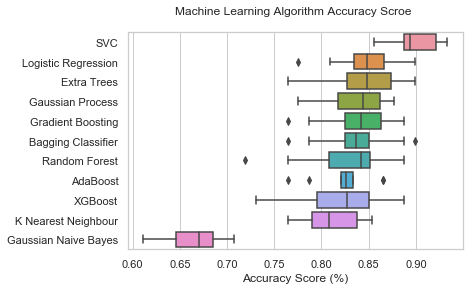

In [103]:
results = pd.DataFrame(scores2).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)
result_df.head(11)

result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Scroe \n')
plt.xlabel('Accuracy Score (%)')

## 하이퍼 파라미터 튜닝

### SVC

In [104]:
Cs = [0.01, 0.1, 1, 5, 10, 15, 20, 50]
gammas = [0.001, 0.01, 0.1]

hyperparams = {'C':Cs, 'gamma':gammas}

gd = GridSearchCV(estimator=SVC(probability=True), param_grid=hyperparams,
                 verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   21.8s finished


0.9023569023569024
{'C': 1, 'gamma': 0.001}


### Gradient Boosting Classifier

In [105]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5]
n_estimators = [100, 1000, 2000]
max_depth = [3, 5, 10, 15]

hyperparams = {'learning_rate' : learning_rate, 'n_estimators':n_estimators}

gd =GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=hyperparams,
                 verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   49.1s finished


0.8518518518518519
{'learning_rate': 0.1, 'n_estimators': 2000}


### Logistic Regression

In [106]:
penalty = ['l1','l2']
C = np.logspace(0,4,10)

hyperparams = {'penalty' : penalty, 'C':C}

gd =GridSearchCV(estimator=LogisticRegression(), param_grid=hyperparams,
                 verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s


0.8888888888888888
{'C': 10000.0, 'penalty': 'l1'}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished


### XGBoost

In [107]:
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 50, 100, 250, 500, 1000]

hyperparams = {'learning_rate' : learning_rate, 'n_estimators':n_estimators}

gd =GridSearchCV(estimator=XGBClassifier(), param_grid=hyperparams,
                 verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   12.0s


0.8226711560044894
{'learning_rate': 0.05, 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.1min finished


In [108]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
min_child_weight = [1, 2, 3 ,4, 5, 6]

hyperparams = {'max_depth' : max_depth, 'min_child_weight':min_child_weight}

gd =GridSearchCV(estimator=XGBClassifier(learning_rate=0.05, n_estimators=10), param_grid=hyperparams,
                 verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s


0.8249158249158249
{'max_depth': 4, 'min_child_weight': 5}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    2.9s finished


In [111]:
gamma = [i*0.1 for i in range(0,5)]

hyperparams = {'gamma' : gamma}

gd =GridSearchCV(estimator=XGBClassifier(learning_rate=0.05, n_estimators=10, min_depth=4, min_child_weight=5),
                 param_grid=hyperparams, verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[16:00:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.8226711560044894
{'gamma': 0.0}


[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished


In [112]:
subsample = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

hyperparams = {'subsample' : subsample, 'colsample_bytree':colsample_bytree}

gd =GridSearchCV(estimator=XGBClassifier(learning_rate=0.05, n_estimators=10, min_depth=4, min_child_weight=5,
                                        gamma=0),
                 param_grid=hyperparams, verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 374 out of 405 | elapsed:    4.2s remaining:    0.3s


[16:03:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.8338945005611672
{'colsample_bytree': 0.9, 'subsample': 0.65}


[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    4.5s finished


In [113]:
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]

hyperparams = {'reg_alpha' : reg_alpha}

gd =GridSearchCV(estimator=XGBClassifier(learning_rate=0.05, n_estimators=10, min_depth=4, min_child_weight=5,
                                        gamma=0, subsample=0.65, colsample_bytre=0.9),
                 param_grid=hyperparams, verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[16:04:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytre, min_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.8260381593714927
{'reg_alpha': 1}


[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.2s finished


### Gaussian Process

In [116]:
n_restarts_optimizer = [0, 1, 2, 3]
max_iter_predict = [1, 2, 5, 10, 20, 35, 50, 100]
warm_start = [True, False]

hyperparams = {'n_restarts_optimizer' : n_restarts_optimizer, 'max_iter_predict':max_iter_predict, 'warm_start' : warm_start}

gd =GridSearchCV(estimator=GaussianProcessClassifier(), param_grid=hyperparams,
                 verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   43.7s finished


0.835016835016835
{'max_iter_predict': 1, 'n_restarts_optimizer': 0, 'warm_start': True}


### AdaBoost

In [117]:
n_estimators = [10, 100, 200, 500]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

hyperparams = {'n_estimators' : n_estimators, 'learning_rate':learning_rate}

gd =GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyperparams,
                 verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   12.0s finished


0.8518518518518519
{'learning_rate': 1, 'n_estimators': 500}


### KNN

In [118]:
n_neighbors = [1, 2, 3, 4, 5]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10]

hyperparams = {'n_neighbors' : n_neighbors, 'algorithm':algorithm, 'weights':weights,
              'leaf_size':leaf_size}

gd =GridSearchCV(estimator=KNeighborsClassifier(), param_grid=hyperparams,
                 verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   15.2s


0.8361391694725028
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   23.2s finished


### Random Forest

In [119]:
n_estimators = [10, 50, 100, 200]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 6]
min_samples_leaf = [2, 6]

hyperparams = {'n_estimators' : n_estimators, 'max_depth':max_depth, 'max_features':max_features,
              'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}

gd =GridSearchCV(estimator=RandomForestClassifier(), param_grid=hyperparams,
                 verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 470 tasks      | elapsed:    8.3s


0.8395061728395061
{'max_depth': None, 'max_features': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}


[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   13.4s finished


### Extra Tree

In [120]:
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 10]
min_samples_leaf = [2, 10]

hyperparams = {'n_estimators' : n_estimators, 'max_depth':max_depth, 'max_features':max_features,
              'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}

gd =GridSearchCV(estimator=ExtraTreesClassifier(), param_grid=hyperparams,
                 verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 519 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 769 tasks      | elapsed:   13.1s


0.8372615039281706
{'max_depth': None, 'max_features': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 75}


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   14.2s finished


### Bagging Classifier

In [121]:
n_estimators = [10, 50, 75, 100, 200]
max_samples = [0.1, 0.2, 0.5, 0.8, 1.0]
max_features = [0.1, 0.2, 0.5, 0.8, 1.0]

hyperparams = {'n_estimators' : n_estimators, 'max_samples':max_samples, 'max_features':max_features}

gd =GridSearchCV(estimator=BaggingClassifier(), param_grid=hyperparams,
                 verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 429 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed:   46.3s finished


0.8496071829405163
{'max_features': 1.0, 'max_samples': 0.8, 'n_estimators': 75}


## 재학습

In [123]:
ran = RandomForestClassifier(max_depth=None, max_features=0.1, min_samples_leaf=2, min_samples_split=2, n_estimators=10)
knn = KNeighborsClassifier(leaf_size=1, n_neighbors=4, weights='distance')
log = LogisticRegression(C=10000.0, penalty='l1')
xgb = XGBClassifier(learning_rate=0.05, n_estimators=10, min_depth=4, min_child_weight=5,
                                        gamma=0, subsample=0.65, colsample_bytre=0.9, reg_alpha=1)
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=2000)
svc = SVC(probability=True, C=1, gamma=0.001)
ext = ExtraTreesClassifier(max_depth=None, max_features=0.1, min_samples_leaf=2, min_samples_split=2, n_estimators=75)
ada = AdaBoostClassifier(learning_rate=1, n_estimators=500)
gpc = GaussianProcessClassifier(max_iter_predict=1, n_restarts_optimizer=0, warm_start=True)
bag = BaggingClassifier(max_features=1.0, max_samples=0.8, n_estimators=75)

models = [ran, knn,log, xgb, gbc, svc, ext, ada, gpc, bag]
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Process', 'Bagging Classifier']
scores3 = {}

for ind, mod in enumerate(models):
    mod.fit(X_train,y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = 'accuracy', cv=10)
    scores3[model_names[ind]] = acc
    
print(scores3)


[16:28:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytre, min_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:28:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytre, min_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:28:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytre, min_depth } might not be used.

  This may not be accurate 

Text(0.5, 0, 'Accuracy Score (%)')

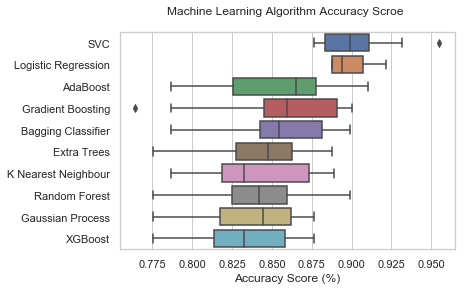

In [124]:
results = pd.DataFrame(scores3).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)
result_df.head(11)

result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Scroe \n')
plt.xlabel('Accuracy Score (%)')

## 보팅


In [126]:
grid_hard = VotingClassifier(estimators=[('Random Forest', ran),
                                        ('Logistic Regression',log),
                                        ('XGBoost',xgb),
                                        ('Extra Trees', ext),
                                        ('Gaussian Process', gpc),
                                        ('SVC', svc),
                                        ('K Nearest Neighbour', knn),
                                        ('Bagging Classifier', bag)], voting='hard')

grid_hard_cv =  model_selection.cross_validate(grid_hard, X_train, y_train, cv=10)
grid_hard.fit(X_train, y_train)

print('Hard votting score mena : {:.2f}'.format(grid_hard_cv['test_score'].mean()*100))

[16:36:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytre, min_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:36:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytre, min_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:36:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytre, min_depth } might not be used.

  This may not be accurate 

In [127]:
grid_soft = VotingClassifier(estimators=[('Random Forest', ran),
                                        ('Logistic Regression',log),
                                        ('XGBoost',xgb),
                                        ('Extra Trees', ext),
                                        ('Gaussian Process', gpc),
                                        ('SVC', svc),
                                        ('K Nearest Neighbour', knn),
                                        ('Bagging Classifier', bag)], voting='soft')

grid_soft_cv =  model_selection.cross_validate(grid_soft, X_train, y_train, cv=10)
grid_soft.fit(X_train, y_train)

print('Hard votting score mena : {:.2f}'.format(grid_soft_cv['test_score'].mean()*100))

[16:37:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytre, min_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:37:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytre, min_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:37:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bytre, min_depth } might not be used.

  This may not be accurate 

## 모델 예측

In [128]:
predictions = grid_soft.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis='columns')

submission.columns = ['PassengerId', 'Survived']
submission.to_csv('titanic_submission146.csv', header=True, index=False)

In [129]:
predictions = grid_hard.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis='columns')

submission.columns = ['PassengerId', 'Survived']
submission.to_csv('titanic_submission145.csv', header=True, index=False)